# Algorithm Comparison

<strong>Date</strong> June 24th, 2019<br />
<strong>Author</strong> Tyler Marrs

This notebook is used to perform runtime comparisons between algorithms within the library. Currently, the following algorithms are compared:

* Brute Force
* STMP
* STAMP
* STOMP
* SCRIMP++

# Environment Overview

Here is the configuration of the system that the comparisons were ran.

## Linux

In [15]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic


## CPU

In [16]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              12
On-line CPU(s) list: 0-11
Thread(s) per core:  2
Core(s) per socket:  6
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               158
Model name:          Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Stepping:            10
CPU MHz:             1200.085
CPU max MHz:         4500.0000
CPU min MHz:         800.0000
BogoMIPS:            5184.00
Virtualization:      VT-x
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            12288K
NUMA node0 CPU(s):   0-11
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vm

## Memory

In [17]:
!lsmem

RANGE                                  SIZE  STATE REMOVABLE   BLOCK
0x0000000000000000-0x0000000007ffffff  128M online        no       0
0x0000000008000000-0x000000002fffffff  640M online       yes     1-5
0x0000000030000000-0x0000000037ffffff  128M online        no       6
0x0000000038000000-0x000000005fffffff  640M online       yes    7-11
0x0000000060000000-0x000000006fffffff  256M online        no   12-13
0x0000000070000000-0x0000000077ffffff  128M online       yes      14
0x0000000078000000-0x000000007fffffff  128M online        no      15
0x0000000100000000-0x000000033fffffff    9G online       yes  32-103
0x0000000340000000-0x0000000347ffffff  128M online        no     104
0x0000000348000000-0x00000005a7ffffff  9.5G online       yes 105-180
0x00000005a8000000-0x00000005b7ffffff  256M online        no 181-182
0x00000005b8000000-0x00000005bfffffff  128M online       yes     183
0x00000005c0000000-0x00000005c7ffffff  128M online        no     184
0x00000005c8000000-0x00000005e7fff

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Varying N

This comparison varies the length of the time series. All window sizes are set to 2^5. Algorithms that allow for approximate solutions, STAMP and SCRIMP++, will compute the exact solutions.

In [2]:
import timeit

In [3]:
results = {
    'Algorithm': [],
    'N': [],
    'Time (seconds)': [],
}
algorithms = [
    'naiveMP',
    'stamp',
    'stmp',
    'stomp',
    'scrimp_plus_plus',
]
m = 2**2

for algorithm in algorithms:
    for i in range(2, 7):
        n = 2**i
        setup = [
            'import numpy as np',
            'from matrixprofile import matrixProfile',
            'ts = np.random.uniform(size={})'.format(n),
            'm = {}'.format(m),
        ]
        setup_code = ';'.join(setup)
        
        runtime_code = 'matrixProfile.{}(ts, m)'.format(algorithm)
        if 'stamp' in algorithm:
            runtime_code = 'matrixProfile.{}(ts, m, sampling=1)'.format(algorithm)

        try:
            result = timeit.timeit(stmt=runtime_code, setup=setup_code, number=1)
        except:
            result = np.nan
        
        results['Algorithm'].append(algorithm)
        results['N'].append(n)
        results['Time (seconds)'].append(result)

/home/tyler/src/matrixprofile-ts/matrixprofile/scrimp.py:71: RuntimeWarning: invalid value encountered in sqrt
  return np.absolute(np.sqrt(dist))


In [4]:
df = pd.DataFrame(results)

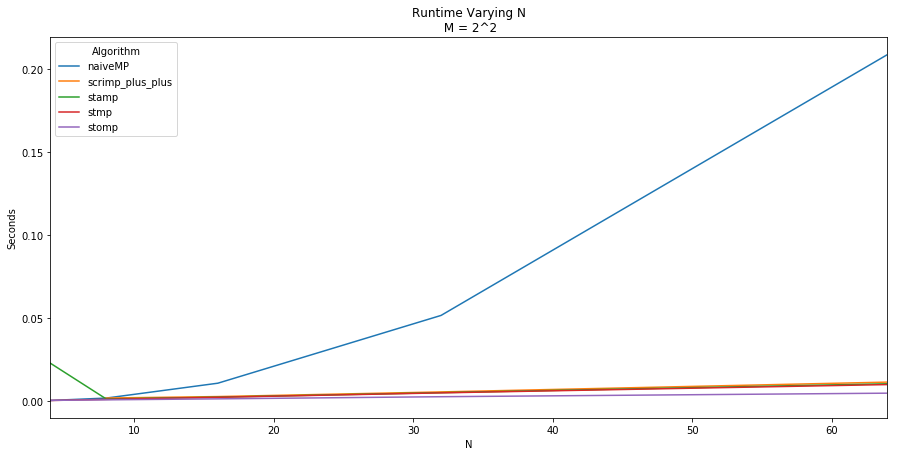

In [5]:
df.pivot(index='N', columns='Algorithm', values='Time (seconds)').plot(title='Runtime Varying N\n M = 2^2', figsize=(15,7))
plt.ylabel('Seconds')
plt.show()

The brute force algorithm (naiveMP) is substantially slower. The next block of code excludes it for a better visual.

In [6]:
results = {
    'Algorithm': [],
    'N': [],
    'Time (seconds)': [],
}
algorithms = [
    'stamp',
    'stmp',
    'stomp',
    'scrimp_plus_plus',
]
m = 2**5

for algorithm in algorithms:
    for i in range(5, 16 + 1):
        n = 2**i
        setup = [
            'import numpy as np',
            'from matrixprofile import matrixProfile',
            'ts = np.random.uniform(size={})'.format(n),
            'm = {}'.format(m),
        ]
        setup_code = ';'.join(setup)
        
        runtime_code = 'matrixProfile.{}(ts, m)'.format(algorithm)
        if 'stamp' in algorithm:
            runtime_code = 'matrixProfile.{}(ts, m, sampling=1)'.format(algorithm)

        try:
            result = timeit.timeit(stmt=runtime_code, setup=setup_code, number=1)
        except:
            result = np.nan
        
        results['Algorithm'].append(algorithm)
        results['N'].append(n)
        results['Time (seconds)'].append(result)

In [7]:
df = pd.DataFrame(results)

In [8]:
df.pivot(index='N', columns='Algorithm', values='Time (seconds)')

Algorithm,scrimp_plus_plus,stamp,stmp,stomp
N,,,,
32,NaN,0.000560,0.000258,0.000378
64,0.002420,0.007444,0.006130,0.003235
128,0.006874,0.017429,0.018546,0.009105
256,0.017401,0.041694,0.046746,0.022254
512,0.037767,0.094860,0.104364,0.049020
1024,0.090069,0.218113,0.229819,0.109860
2048,0.199179,0.506619,0.488151,0.238634
4096,0.494935,1.269767,1.205309,0.600159
8192,1.626394,3.793990,4.354721,1.547446


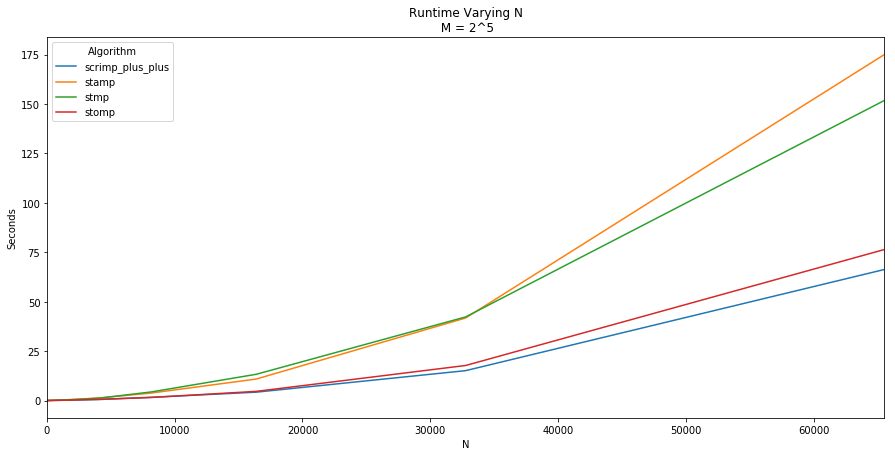

In [9]:
df.pivot(index='N', columns='Algorithm', values='Time (seconds)').plot(title='Runtime Varying N\n M = 2^5', figsize=(15,7))
plt.ylabel('Seconds')
plt.show()

# Varying M

This comparison varies the length of the window size. The time series length is set to 2^16. Algorithms that allow for approximate solutions, STAMP and SCRIMP++, will compute the exact solutions.

In [10]:
results = {
    'Algorithm': [],
    'M': [],
    'Time (seconds)': [],
}
algorithms = [
    'stamp',
    'stmp',
    'stomp',
    'scrimp_plus_plus',
]
n = 2**16

for algorithm in algorithms:
    for i in range(5, 16 + 1):
        m = 2**i
        setup = [
            'import numpy as np',
            'from matrixprofile import matrixProfile',
            'ts = np.random.uniform(size={})'.format(n),
            'm = {}'.format(m),
        ]
        setup_code = ';'.join(setup)
        
        runtime_code = 'matrixProfile.{}(ts, m)'.format(algorithm)
        if 'stamp' in algorithm:
            runtime_code = 'matrixProfile.{}(ts, m, sampling=1)'.format(algorithm)

        try:
            result = timeit.timeit(stmt=runtime_code, setup=setup_code, number=1)
        except:
            result = np.nan
        
        results['Algorithm'].append(algorithm)
        results['M'].append(m)
        results['Time (seconds)'].append(result)

In [11]:
df = pd.DataFrame(results)

In [12]:
df.pivot(index='M', columns='Algorithm', values='Time (seconds)')

Algorithm,scrimp_plus_plus,stamp,stmp,stomp
M,,,,
32,71.764426,153.072150,152.008031,73.321741
64,52.659284,153.320803,150.998736,78.245222
128,42.946720,153.121852,160.189583,77.185399
256,37.685006,153.585664,189.094520,76.843684
512,35.076449,156.287819,169.903316,77.710089
1024,32.879146,149.571059,153.249620,78.927589
2048,30.885337,148.068748,150.087723,75.934823
4096,27.864315,140.942837,139.156057,70.070297
8192,23.987461,129.746884,126.638202,56.340517


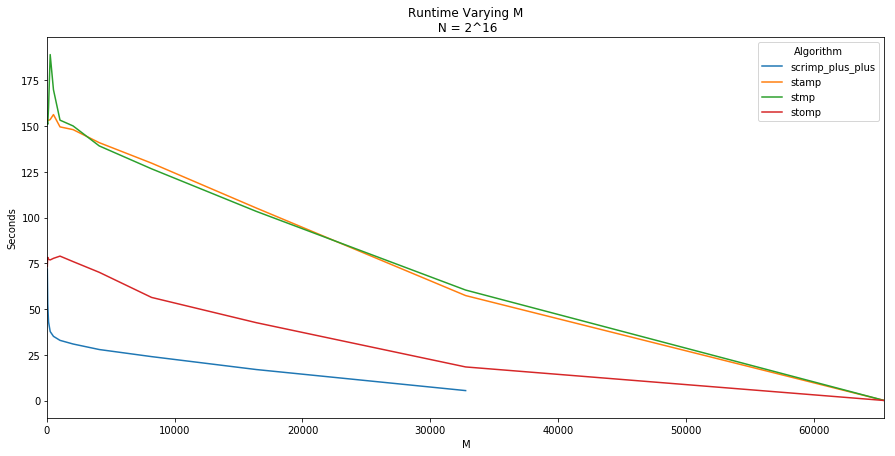

In [13]:
df.pivot(index='M', columns='Algorithm', values='Time (seconds)').plot(title='Runtime Varying M\n N = 2^16', figsize=(15,7))
plt.ylabel('Seconds')
plt.show()